In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline

In [2]:
DATA_PATH = "data/"

In [3]:
data = pd.read_csv(DATA_PATH + "Database Indira Naylarissa Content List - db.csv")
data.tail()

,id,title,views,date,url,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,note,Last Update
64,65,"Ngobrol tapi bisik bisik aja, biar cuma kamu y...",531.0,24-December-2022,https://youtu.be/XJ6zRKUAOFg,Live,NaN,NaN,Free Talk,False,02:05:45,21:00,23:05,NaN,NaN
65,66,Aku aslinya setia~,612.0,25-December-2022,https://www.youtube.com/watch?v=yg_TM1GLqWw,Live,Selingkuh Simulator,NaN,Game,False,01:28:29,20:30,21:58,NaN,NaN
66,67,Nemenin kalian yang sekepian~,959.0,25-December-2022,https://www.youtube.com/watch?v=Oj3DqrMBfLQ,Live,NaN,Guerilla,Free Talk,False,02:21:21,22:45,01:06,NaN,NaN
67,68,Kangen ya?,851.0,31-December-2022,https://youtu.be/RgsUEuyQw5A,Live,NaN,NaN,Free Talk,False,02:49:09,22:00,00:49,NaN,NaN
68,69,Kangen kan? :p,775.0,01-January-2023,https://www.youtube.com/watch?v=EocDGWtVcCQ,Live,NaN,NaN,Free Talk,False,02:19:40,22:30,00:49,NaN,NaN


In [4]:
data.shape

(69, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            69 non-null     int64  
 1   title         69 non-null     object 
 2   views         68 non-null     float64
 3   date          69 non-null     object 
 4   url           69 non-null     object 
 5   content_type  69 non-null     object 
 6   game_name     28 non-null     object 
 7   content_name  26 non-null     object 
 8   topic         69 non-null     object 
 9   collab_flag   69 non-null     bool   
 10  duration      68 non-null     object 
 11  start_stream  69 non-null     object 
 12  end_stream    68 non-null     object 
 13  note          1 non-null      object 
 14  Last Update   2 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 7.7+ KB


In [6]:
COLS = ['url', 'note', "Last Update"]

In [7]:
data.drop(COLS, axis=1, inplace=True)

### Pick data after debut 

In [8]:
data

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
0,1,Fuyu Biyori,1615.0,26-September-2022,Cover,NaN,NaN,Cover,False,04:35,0,0
1,2,"Mendaki gunung, lewati~ 🎶",1731.0,26-September-2022,Live,NaN,NaN,Debut,False,00:55:54,20:00,20:55
2,3,Ngobrol manis gratis💜💜,733.0,30-September-2022,Live,NaN,NaN,Free Talk,False,02:17:52,21:00,23:17
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,1-October-2022,Live,Circle Empires Rivals,NaN,Game,False,04:02:20,20:00,00:02
4,5,Belajar Mencitaiku🍄,851.0,02-October-2022,Live,NaN,Study With Me,Free Talk,False,03:39:20,21:00,00:39
...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,"Ngobrol tapi bisik bisik aja, biar cuma kamu y...",531.0,24-December-2022,Live,NaN,NaN,Free Talk,False,02:05:45,21:00,23:05
65,66,Aku aslinya setia~,612.0,25-December-2022,Live,Selingkuh Simulator,NaN,Game,False,01:28:29,20:30,21:58
66,67,Nemenin kalian yang sekepian~,959.0,25-December-2022,Live,NaN,Guerilla,Free Talk,False,02:21:21,22:45,01:06
67,68,Kangen ya?,851.0,31-December-2022,Live,NaN,NaN,Free Talk,False,02:49:09,22:00,00:49


In [9]:
data[2:]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
2,3,Ngobrol manis gratis💜💜,733.0,30-September-2022,Live,NaN,NaN,Free Talk,False,02:17:52,21:00,23:17
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,1-October-2022,Live,Circle Empires Rivals,NaN,Game,False,04:02:20,20:00,00:02
4,5,Belajar Mencitaiku🍄,851.0,02-October-2022,Live,NaN,Study With Me,Free Talk,False,03:39:20,21:00,00:39
5,6,Berburu Sesuatu yang Tak Kasat Rasa,791.0,03-October-2022,Live,Phasmophobia,NaN,Game,True,02:49:02,21:00,23:49
6,7,Pecahkan Saja Gelasnya Biar Pecah,555.0,04-October-2022,Live,NaN,NaN,Free Talk,True,01:34:41,20:30,22:04
...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,"Ngobrol tapi bisik bisik aja, biar cuma kamu y...",531.0,24-December-2022,Live,NaN,NaN,Free Talk,False,02:05:45,21:00,23:05
65,66,Aku aslinya setia~,612.0,25-December-2022,Live,Selingkuh Simulator,NaN,Game,False,01:28:29,20:30,21:58
66,67,Nemenin kalian yang sekepian~,959.0,25-December-2022,Live,NaN,Guerilla,Free Talk,False,02:21:21,22:45,01:06
67,68,Kangen ya?,851.0,31-December-2022,Live,NaN,NaN,Free Talk,False,02:49:09,22:00,00:49


In [10]:
data = data[2:].copy()

In [11]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
2,3,Ngobrol manis gratis💜💜,733.0,30-September-2022,Live,NaN,NaN,Free Talk,False,02:17:52,21:00,23:17
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,1-October-2022,Live,Circle Empires Rivals,NaN,Game,False,04:02:20,20:00,00:02
4,5,Belajar Mencitaiku🍄,851.0,02-October-2022,Live,NaN,Study With Me,Free Talk,False,03:39:20,21:00,00:39
5,6,Berburu Sesuatu yang Tak Kasat Rasa,791.0,03-October-2022,Live,Phasmophobia,NaN,Game,True,02:49:02,21:00,23:49
6,7,Pecahkan Saja Gelasnya Biar Pecah,555.0,04-October-2022,Live,NaN,NaN,Free Talk,True,01:34:41,20:30,22:04


### Filter data yang tanpa Collab 

In [12]:
data = data[data["collab_flag"] == False]

In [13]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
2,3,Ngobrol manis gratis💜💜,733.0,30-September-2022,Live,NaN,NaN,Free Talk,False,02:17:52,21:00,23:17
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,1-October-2022,Live,Circle Empires Rivals,NaN,Game,False,04:02:20,20:00,00:02
4,5,Belajar Mencitaiku🍄,851.0,02-October-2022,Live,NaN,Study With Me,Free Talk,False,03:39:20,21:00,00:39
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,06-October-2022,Live,NaN,Jurnal Dira,Free Talk,False,03:13:43,21:00,00:13
9,10,Berkenalan dengan Halus🍄,775.0,09-October-2022,Live,NaN,Study With Me,Free Talk,False,04:08:16,20:00,00:08


In [14]:
data.shape

(48, 12)

### Delete Collab Flag 

In [15]:
data.drop(["collab_flag"], axis=1, inplace=True)

In [16]:
def impute_missing_values(columns):
    data[columns] = data[columns].fillna("UNKNOWN")

In [17]:
impute_missing_values(columns = ["game_name", "content_name"])

In [18]:
data.isna().sum()

id              0
title           0
views           0
date            0
content_type    0
game_name       0
content_name    0
topic           0
duration        0
start_stream    0
end_stream      0
dtype: int64

### Convert Data into datetime and get days & hours?

In [19]:
data['date'] = data['date'].apply(pd.to_datetime)

In [20]:
data['days'] = data['date'].dt.dayofweek

In [22]:
data

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00,23:17,4
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00,00:02,5
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00,00:39,6
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00,00:13,3
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00,00:08,6
10,11,Ngobrol pelan-pelan sebelum tidur,604.0,2022-10-10,Live,UNKNOWN,Guerilla,Free Talk,02:11:00,22:15,00:26,0
11,12,Getting Over It - Calme~,445.0,2022-10-12,Live,Getting Over It,Guerilla,Game,01:52:04,22:15,00:07,2
12,13,Seberapa Menakutkan Cerita Horror Viewers? Par...,473.0,2022-10-13,Live,UNKNOWN,Jurnal Dira,Free Talk,02:24:36,21:00,23:24,3
14,15,Belajar Mencitaiku Part. 2 (edisi gombalindira)🍄,610.0,2022-10-16,Live,UNKNOWN,Study With Me,Free Talk,02:17:22,20:30,22:47,6
15,16,Cerita Hari Ini,639.0,2022-10-17,Live,UNKNOWN,Guerilla,Free Talk,02:51:52,21:30,00:21,0


### Convert from number to specific days

In [23]:
DAYS_CONVERT = {
                0: "Senin",
                1: "Selasa",
                2: "Rabu",
                3: "Kamis",
                4: "Jum'at",
                5: "Sabtu",
                6: "Minggu"
               }

In [24]:
data.replace({"days": DAYS_CONVERT}, inplace=True)

In [25]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00,23:17,Jum'at
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00,00:02,Sabtu
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00,00:39,Minggu
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00,00:13,Kamis
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00,00:08,Minggu


### Coba get only hour 

In [26]:
data['start_stream'] = pd.to_datetime(data['start_stream']).dt.time

In [27]:
data["hours"] = pd.to_datetime(data['start_stream'], format='%H:%M:%S').dt.hour

In [29]:
data

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00:00,23:17,Jum'at,21
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00:00,00:02,Sabtu,20
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00:00,00:39,Minggu,21
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00:00,00:13,Kamis,21
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00:00,00:08,Minggu,20
10,11,Ngobrol pelan-pelan sebelum tidur,604.0,2022-10-10,Live,UNKNOWN,Guerilla,Free Talk,02:11:00,22:15:00,00:26,Senin,22
11,12,Getting Over It - Calme~,445.0,2022-10-12,Live,Getting Over It,Guerilla,Game,01:52:04,22:15:00,00:07,Rabu,22
12,13,Seberapa Menakutkan Cerita Horror Viewers? Par...,473.0,2022-10-13,Live,UNKNOWN,Jurnal Dira,Free Talk,02:24:36,21:00:00,23:24,Kamis,21
14,15,Belajar Mencitaiku Part. 2 (edisi gombalindira)🍄,610.0,2022-10-16,Live,UNKNOWN,Study With Me,Free Talk,02:17:22,20:30:00,22:47,Minggu,20
15,16,Cerita Hari Ini,639.0,2022-10-17,Live,UNKNOWN,Guerilla,Free Talk,02:51:52,21:30:00,00:21,Senin,21


### Get count days for Livestream 

In [33]:
data["days"].value_counts()

Minggu    10
Jum'at     8
Kamis      8
Sabtu      7
Senin      6
Rabu       5
Selasa     4
Name: days, dtype: int64

In [34]:
print(f"Selama 3 bulan ini, Indira sudah melakukan stream sebanyak {len(data.index)} kali")

Selama 3 bulan ini, Indira sudah melakukan stream sebanyak 48 kali


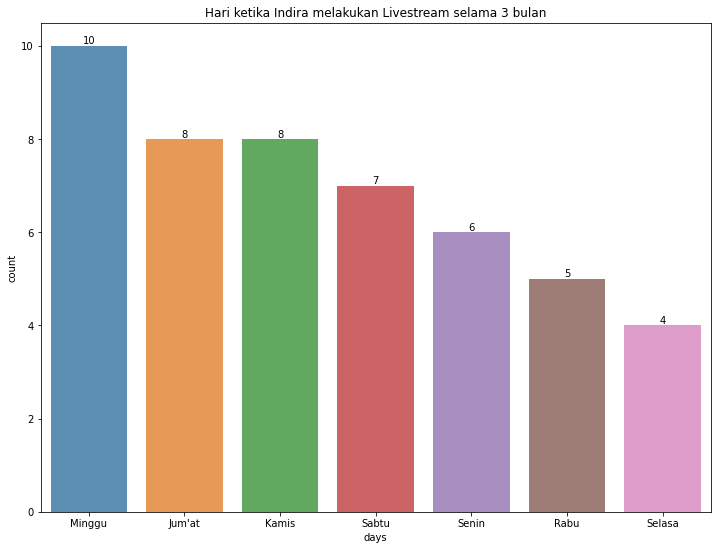

In [43]:
plt.figure(figsize=(12,9))
plt.title("Hari ketika Indira melakukan Livestream selama 3 bulan")
ax = sns.countplot(data['days'], alpha=0.8, order = data['days'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [39]:
get_avg_days = round(data.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [40]:
get_avg_days

days
Senin     714.50
Selasa    638.25
Rabu      674.40
Kamis     589.00
Jum'at    819.62
Sabtu     748.14
Minggu    676.90
Name: views, dtype: float64

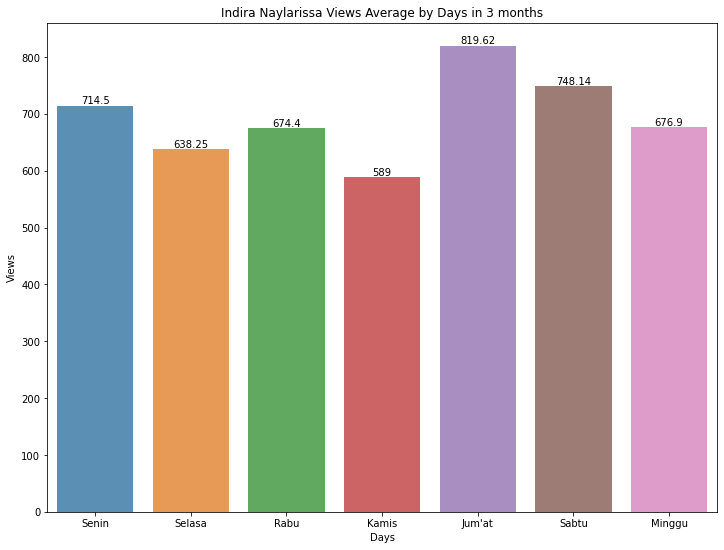

In [42]:
plt.figure(figsize=(12,9))
ax = sns.barplot(get_avg_days.index, get_avg_days.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Indira Naylarissa Views Average by Days in 3 months")
plt.show()

### Get count hours livestream 

In [44]:
data["hours"].value_counts()

21    15
20    12
22     7
19     6
23     2
13     1
11     1
0      1
16     1
8      1
7      1
Name: hours, dtype: int64

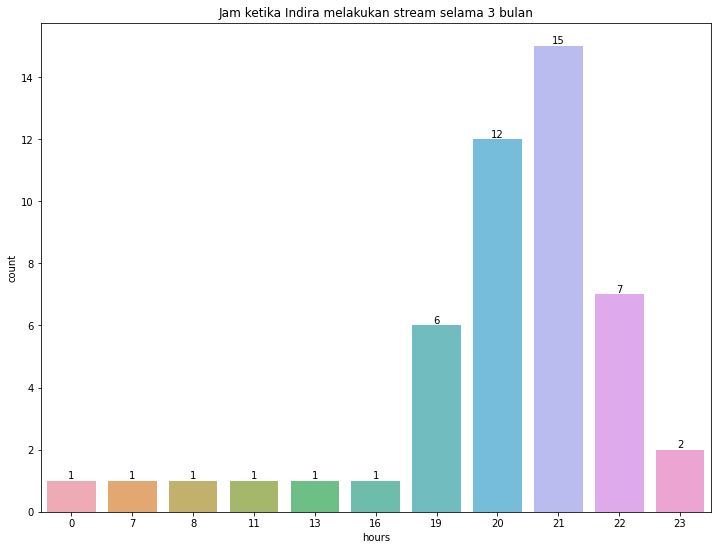

In [57]:
plt.figure(figsize=(12,9))
plt.title("Jam ketika Indira melakukan stream selama 3 bulan")
ax = sns.countplot(data['hours'], alpha=0.8)
ax.bar_label(ax.containers[0])
plt.show()

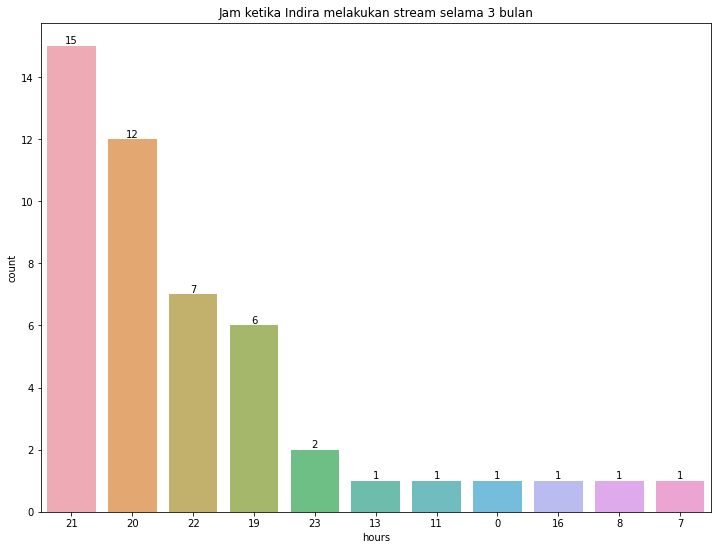

In [45]:
plt.figure(figsize=(12,9))
plt.title("Jam ketika Indira melakukan stream selama 3 bulan")
ax = sns.countplot(data['hours'], alpha=0.8, order = data['hours'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

### Trend Views in 3 months 

In [46]:
min(data["date"]), max(data["date"])

(Timestamp('2022-09-30 00:00:00'), Timestamp('2023-01-01 00:00:00'))

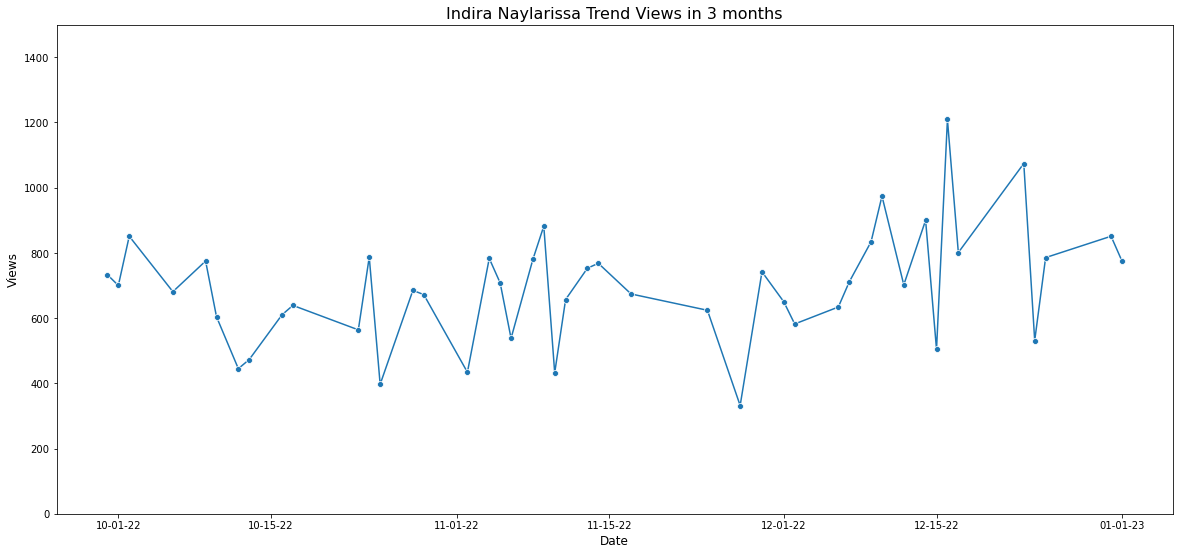

In [117]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20,9))
ax = sns.lineplot(x = "date", y = "views", data=data, marker='o', ci=None)
plt.ylim(0, 1500)
plt.title('Indira Naylarissa Trend Views in 3 months', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [49]:
min_views = min(data["views"])
min_views

332.0

In [50]:
data[data["views"] == min_views]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
48,49,Wagyu wagyu ajaib~ 🎶,332.0,2022-11-27,Live,UNKNOWN,UNKNOWN,Free Talk,01:08:44,19:00:00,20:08,Minggu,19


In [51]:
max_views = max(data["views"])
max_views

1209.0

In [52]:
data[data["views"] == max_views]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
61,62,Mengamen di telingamu~,1209.0,2022-12-16,Live,UNKNOWN,UNKNOWN,Karaoke,05:03:35,19:00:00,00:03,Jum'at,19


### Views distribution 

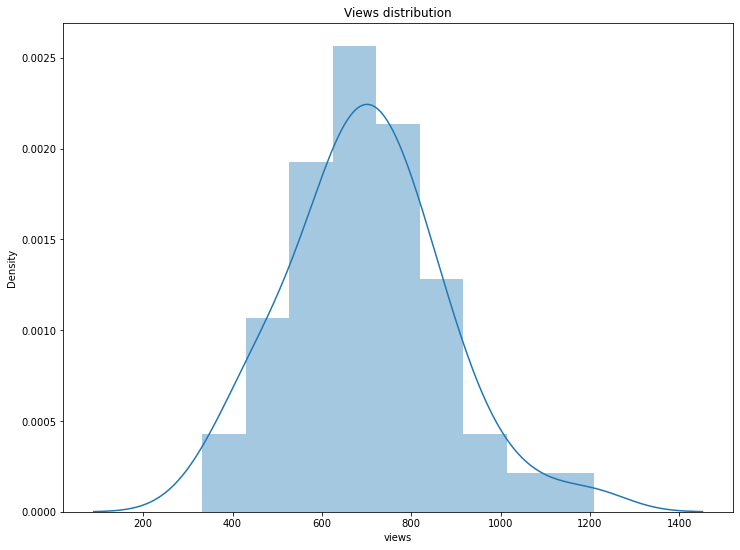

In [54]:
plt.figure(figsize=(12,9))
plt.title('Views distribution')
sns.distplot(data['views'])
plt.show()

### Get average views 

In [55]:
mean = np.average(data['views'])
mean

697.6458333333334

### Get median views 

In [56]:
median = np.median(data['views'])
median

697.0

### Get average views in each hours

In [109]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00:00,23:17,Jum'at,21,137.87
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00:00,00:02,Sabtu,20,242.33
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00:00,00:39,Minggu,21,219.33
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00:00,00:13,Kamis,21,193.72
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00:00,00:08,Minggu,20,248.27


In [112]:
avg_views_hours = round(data.groupby(['hours'])["views"].mean(), 2)

In [113]:
avg_views_hours

hours
0     397.00
7     711.00
8     783.00
11    694.00
13    564.00
16    685.00
19    730.17
20    705.33
21    731.93
22    709.00
23    433.00
Name: views, dtype: float64

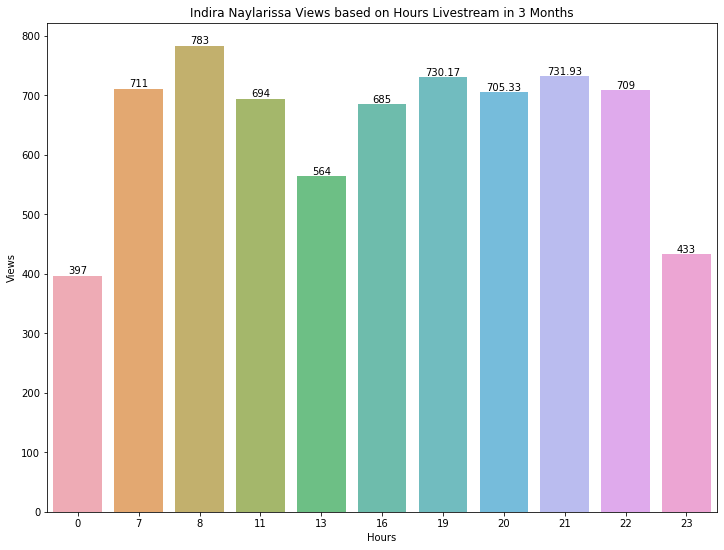

In [115]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_views_hours.index, avg_views_hours.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Hours")
plt.ylabel("Views")
plt.title("Indira Naylarissa Views based on Hours Livestream in 3 Months")
plt.show()

### Convert Timestamp duration to Minutes

In [58]:
data['duration'] = data['duration'].astype('str') 

In [60]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00:00,23:17,Jum'at,21
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00:00,00:02,Sabtu,20
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00:00,00:39,Minggu,21
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00:00,00:13,Kamis,21
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00:00,00:08,Minggu,20


In [61]:
# https://stackoverflow.com/a/60638687
convert_data = []
for duration in data['duration']:
    delta = timedelta(hours=int(duration.split(':')[0]), minutes=int(duration.split(':')[1]), seconds=int(duration.split(':')[2]))
    minutes = delta.total_seconds()/60
    convert_data.append(round(minutes,2))

In [62]:
convert_data

[137.87,
 242.33,
 219.33,
 193.72,
 248.27,
 131.0,
 112.07,
 144.6,
 137.37,
 171.87,
 182.03,
 144.87,
 240.43,
 131.93,
 106.87,
 145.57,
 189.4,
 178.37,
 221.33,
 163.55,
 286.37,
 195.55,
 106.75,
 266.53,
 187.62,
 130.3,
 105.85,
 212.95,
 205.53,
 68.73,
 236.6,
 197.4,
 152.22,
 174.78,
 176.5,
 256.72,
 294.13,
 185.3,
 282.65,
 118.33,
 303.58,
 210.5,
 207.55,
 125.75,
 88.48,
 141.35,
 169.15,
 139.67]

In [63]:
data['convert_duration_minutes'] = convert_data

In [66]:
data.tail()

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
64,65,"Ngobrol tapi bisik bisik aja, biar cuma kamu y...",531.0,2022-12-24,Live,UNKNOWN,UNKNOWN,Free Talk,02:05:45,21:00:00,23:05,Sabtu,21,125.75
65,66,Aku aslinya setia~,612.0,2022-12-25,Live,Selingkuh Simulator,UNKNOWN,Game,01:28:29,20:30:00,21:58,Minggu,20,88.48
66,67,Nemenin kalian yang sekepian~,959.0,2022-12-25,Live,UNKNOWN,Guerilla,Free Talk,02:21:21,22:45:00,01:06,Minggu,22,141.35
67,68,Kangen ya?,851.0,2022-12-31,Live,UNKNOWN,UNKNOWN,Free Talk,02:49:09,22:00:00,00:49,Sabtu,22,169.15
68,69,Kangen kan? :p,775.0,2023-01-01,Live,UNKNOWN,UNKNOWN,Free Talk,02:19:40,22:30:00,00:49,Minggu,22,139.67


### Average per minutes

In [69]:
mean_duration = np.average(data['convert_duration_minutes'])

# di convert jadi hours lagi?
round(mean_duration / 60, 2)

3.01

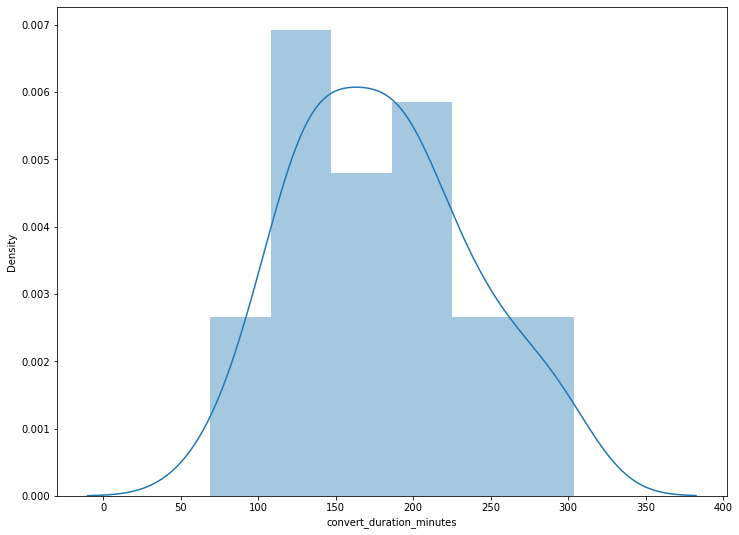

In [73]:
plt.figure(figsize=(12, 9))
sns.distplot(data["convert_duration_minutes"])
plt.show()

### Get average Stream Duration by Days 

In [83]:
avg_stream_duration_days = round(data.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]) / 60, 2)

In [84]:
avg_stream_duration_days

days
Senin     2.79
Selasa    3.46
Rabu      3.19
Kamis     2.68
Jum'at    3.35
Sabtu     3.35
Minggu    2.63
Name: convert_duration_minutes, dtype: float64

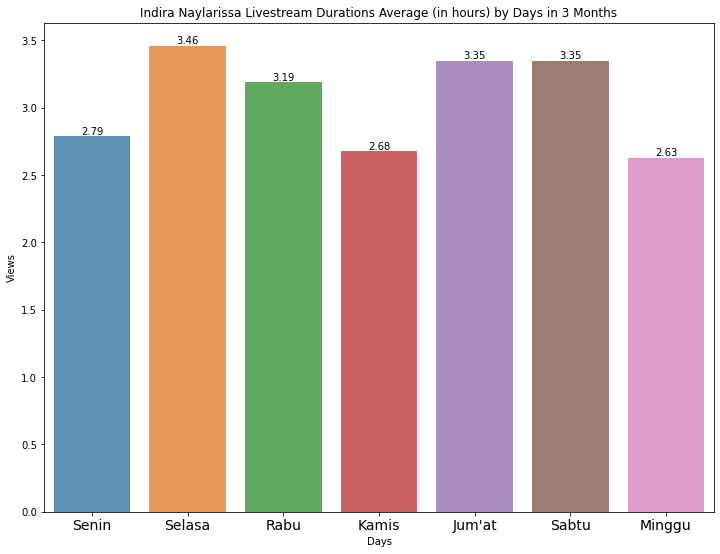

In [91]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_stream_duration_days.index, avg_stream_duration_days.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Views")
plt.xticks(fontsize=14)
plt.title("Indira Naylarissa Livestream Durations Average (in hours) by Days in 3 Months")
plt.show()

In [92]:
data[data["days"] == "Selasa"]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
22,23,Mobile Legends Part2,397.0,2022-10-25,Live,Mobile Legends,Guerilla,Game,02:11:56,00:00:00,02:11,Selasa,0,131.93
32,33,Mari tersenyum bersamaku,780.0,2022-11-08,Live,Dota 2,UNKNOWN,Game,04:46:22,20:00:00,00:46,Selasa,20,286.37
50,51,Main lagi sama om Predi~,742.0,2022-11-29,Live,Five Nights at Freddy's,UNKNOWN,Game,03:56:36,20:00:00,23:56,Selasa,20,236.60
54,55,Belajar Menghilangkan Stress,634.0,2022-12-06,Live,UNKNOWN,Study With Me,Free Talk,02:54:47,20:00:00,22:54,Selasa,20,174.78


In [93]:
data[data["days"] == "Jum'at"]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00:00,23:17,Jum'at,21,137.87
23,24,untuk Beli Hero Mobile Legends (I'm not addict...,685.0,2022-10-28,Live,Mobile Legends,Guerilla,Game,01:46:52,16:30:00,18:16,Jum'at,16,106.87
29,30,"Hei kamu! Bangun yuk, udah pagi",783.0,2022-11-04,Live,UNKNOWN,UNKNOWN,Free Talk,02:58:22,08:00:00,10:58,Jum'at,8,178.37
36,37,:),657.0,2022-11-11,Live,UNKNOWN,UNKNOWN,Karaoke,04:26:32,22:15:00,02:41,Jum'at,22,266.53
52,53,AYO KITA NGOBROL SECARA BAIK BAIK :),582.0,2022-12-02,Live,UNKNOWN,UNKNOWN,Free Talk,02:32:13,21:00:00,23:32,Jum'at,21,152.22
56,57,Mencoba bermain main yey~,834.0,2022-12-09,Live,AutoChess Moba,UNKNOWN,Game,04:16:43,21:00:00,01:16,Jum'at,21,256.72
61,62,Mengamen di telingamu~,1209.0,2022-12-16,Live,UNKNOWN,UNKNOWN,Karaoke,05:03:35,19:00:00,00:03,Jum'at,19,303.58
63,64,Ngobrol depan rumah Bu Sri~,1074.0,2022-12-23,Live,UNKNOWN,UNKNOWN,Free Talk,03:27:33,21:00:00,00:27,Jum'at,21,207.55


In [94]:
data[data["days"] == "Sabtu"]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00:00,00:02,Sabtu,20,242.33
24,25,Cerita sambil membuat jadwal,672.0,2022-10-29,Live,UNKNOWN,Guerilla,Free Talk,02:25:34,22:30:00,00:55,Sabtu,22,145.57
30,31,Quality Time with Yourdira,708.0,2022-11-05,Live,UNKNOWN,UNKNOWN,Free Talk,03:41:20,20:00:00,23:41,Sabtu,20,221.33
57,58,Menerka-nerka genggamanmu,974.0,2022-12-10,Live,UNKNOWN,UNKNOWN,Free Talk,04:54:08,20:00:00,00:54,Sabtu,20,294.13
62,63,Belajar mengerti cwk,801.0,2022-12-17,Live,UNKNOWN,Study With Me,Free Talk,03:30:30,20:30:00,00:00,Sabtu,20,210.50
64,65,"Ngobrol tapi bisik bisik aja, biar cuma kamu y...",531.0,2022-12-24,Live,UNKNOWN,UNKNOWN,Free Talk,02:05:45,21:00:00,23:05,Sabtu,21,125.75
67,68,Kangen ya?,851.0,2022-12-31,Live,UNKNOWN,UNKNOWN,Free Talk,02:49:09,22:00:00,00:49,Sabtu,22,169.15


In [95]:
data[data["days"] == "Minggu"]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00:00,00:39,Minggu,21,219.33
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00:00,00:08,Minggu,20,248.27
14,15,Belajar Mencitaiku Part. 2 (edisi gombalindira)🍄,610.0,2022-10-16,Live,UNKNOWN,Study With Me,Free Talk,02:17:22,20:30:00,22:47,Minggu,20,137.37
18,19,Bermain bersama Om Boxy jilid II,564.0,2022-10-23,Live,Getting Over It,UNKNOWN,Game,03:02:02,13:00:00,16:02,Minggu,13,182.03
31,32,mada mada,538.0,2022-11-06,Live,Getting Over It,UNKNOWN,Game,02:43:33,19:30:00,22:13,Minggu,19,163.55
37,38,Ngobrol santai sambil bahas hal-hal seram,753.0,2022-11-13,Live,UNKNOWN,Jurnal Dira,Free Talk,03:07:37,21:30:00,00:37,Minggu,21,187.62
48,49,Wagyu wagyu ajaib~ 🎶,332.0,2022-11-27,Live,UNKNOWN,UNKNOWN,Free Talk,01:08:44,19:00:00,20:08,Minggu,19,68.73
65,66,Aku aslinya setia~,612.0,2022-12-25,Live,Selingkuh Simulator,UNKNOWN,Game,01:28:29,20:30:00,21:58,Minggu,20,88.48
66,67,Nemenin kalian yang sekepian~,959.0,2022-12-25,Live,UNKNOWN,Guerilla,Free Talk,02:21:21,22:45:00,01:06,Minggu,22,141.35
68,69,Kangen kan? :p,775.0,2023-01-01,Live,UNKNOWN,UNKNOWN,Free Talk,02:19:40,22:30:00,00:49,Minggu,22,139.67


In [96]:
data[data["convert_duration_minutes"] == max(data["convert_duration_minutes"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
61,62,Mengamen di telingamu~,1209.0,2022-12-16,Live,UNKNOWN,UNKNOWN,Karaoke,05:03:35,19:00:00,00:03,Jum'at,19,303.58


In [97]:
data[data["convert_duration_minutes"] == min(data["convert_duration_minutes"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
48,49,Wagyu wagyu ajaib~ 🎶,332.0,2022-11-27,Live,UNKNOWN,UNKNOWN,Free Talk,01:08:44,19:00:00,20:08,Minggu,19,68.73


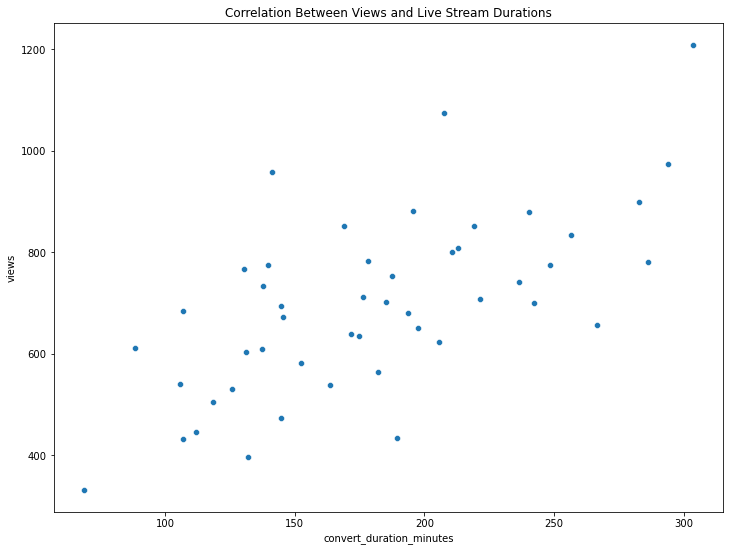

In [98]:
plt.figure(figsize=(12,9))
plt.title("Correlation Between Views and Live Stream Durations")
sns.scatterplot(y='views', x='convert_duration_minutes', data=data)
plt.savefig("gambar_7.jpg")
plt.show()

- Berdasarkan hasil scatter plot dapat dilihat, kalo semakin lama streaming maka views nya akan semakin banyak

### Indira Livestream Topics 

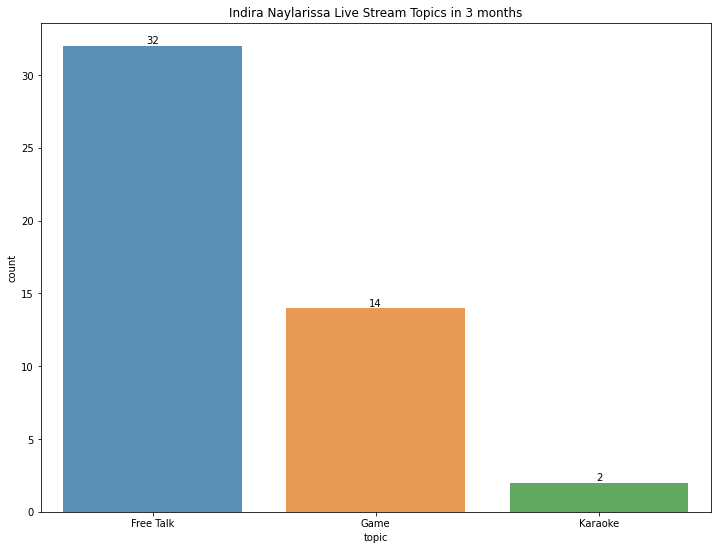

In [106]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Live Stream Topics in 3 months')
ax = sns.countplot(data['topic'], alpha=0.8)
ax.bar_label(ax.containers[0])
plt.show()

### Free Talk Topic 

In [107]:
free_talk = data[data["topic"] == "Free Talk"]

In [108]:
free_talk

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
2,3,Ngobrol manis gratis💜💜,733.0,2022-09-30,Live,UNKNOWN,UNKNOWN,Free Talk,02:17:52,21:00:00,23:17,Jum'at,21,137.87
4,5,Belajar Mencitaiku🍄,851.0,2022-10-02,Live,UNKNOWN,Study With Me,Free Talk,03:39:20,21:00:00,00:39,Minggu,21,219.33
7,8,Seberapa Menakutkan Cerita Horror Viewers? Par...,681.0,2022-10-06,Live,UNKNOWN,Jurnal Dira,Free Talk,03:13:43,21:00:00,00:13,Kamis,21,193.72
9,10,Berkenalan dengan Halus🍄,775.0,2022-10-09,Live,UNKNOWN,Study With Me,Free Talk,04:08:16,20:00:00,00:08,Minggu,20,248.27
10,11,Ngobrol pelan-pelan sebelum tidur,604.0,2022-10-10,Live,UNKNOWN,Guerilla,Free Talk,02:11:00,22:15:00,00:26,Senin,22,131.00
12,13,Seberapa Menakutkan Cerita Horror Viewers? Par...,473.0,2022-10-13,Live,UNKNOWN,Jurnal Dira,Free Talk,02:24:36,21:00:00,23:24,Kamis,21,144.60
14,15,Belajar Mencitaiku Part. 2 (edisi gombalindira)🍄,610.0,2022-10-16,Live,UNKNOWN,Study With Me,Free Talk,02:17:22,20:30:00,22:47,Minggu,20,137.37
15,16,Cerita Hari Ini,639.0,2022-10-17,Live,UNKNOWN,Guerilla,Free Talk,02:51:52,21:30:00,00:21,Senin,21,171.87
19,20,"Makan siang, yuk?",694.0,2022-10-24,Live,UNKNOWN,UNKNOWN,Free Talk,02:24:52,11:30:00,13:54,Senin,11,144.87
24,25,Cerita sambil membuat jadwal,672.0,2022-10-29,Live,UNKNOWN,Guerilla,Free Talk,02:25:34,22:30:00,00:55,Sabtu,22,145.57


In [119]:
free_talk[free_talk["views"] == max(free_talk["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
63,64,Ngobrol depan rumah Bu Sri~,1074.0,2022-12-23,Live,UNKNOWN,UNKNOWN,Free Talk,03:27:33,21:00:00,00:27,Jum'at,21,207.55


In [120]:
free_talk[free_talk["views"] == min(free_talk["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
48,49,Wagyu wagyu ajaib~ 🎶,332.0,2022-11-27,Live,UNKNOWN,UNKNOWN,Free Talk,01:08:44,19:00:00,20:08,Minggu,19,68.73


### Game Topic 

In [104]:
data_game = data[data['topic'] == 'Game']

In [105]:
data_game

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,2022-10-01,Live,Circle Empires Rivals,UNKNOWN,Game,04:02:20,20:00:00,00:02,Sabtu,20,242.33
11,12,Getting Over It - Calme~,445.0,2022-10-12,Live,Getting Over It,Guerilla,Game,01:52:04,22:15:00,00:07,Rabu,22,112.07
18,19,Bermain bersama Om Boxy jilid II,564.0,2022-10-23,Live,Getting Over It,UNKNOWN,Game,03:02:02,13:00:00,16:02,Minggu,13,182.03
20,21,Mobile Legends,880.0,2022-10-24,Live,Mobile Legends,Guerilla,Game,04:00:26,19:00:00,23:00,Senin,19,240.43
22,23,Mobile Legends Part2,397.0,2022-10-25,Live,Mobile Legends,Guerilla,Game,02:11:56,00:00:00,02:11,Selasa,0,131.93
23,24,untuk Beli Hero Mobile Legends (I'm not addict...,685.0,2022-10-28,Live,Mobile Legends,Guerilla,Game,01:46:52,16:30:00,18:16,Jum'at,16,106.87
27,28,Bermain legenda selular dan berbincang santai~,434.0,2022-11-02,Live,Mobile Legends,Guerilla,Game,03:09:24,23:30:00,02:39,Rabu,23,189.40
31,32,mada mada,538.0,2022-11-06,Live,Getting Over It,UNKNOWN,Game,02:43:33,19:30:00,22:13,Minggu,19,163.55
32,33,Mari tersenyum bersamaku,780.0,2022-11-08,Live,Dota 2,UNKNOWN,Game,04:46:22,20:00:00,00:46,Selasa,20,286.37
41,42,Yeay main sama Om Predi yuhu~,808.0,2022-11-17,Live,Five Nights at Freddy's,UNKNOWN,Game,03:32:57,21:30:00,01:02,Kamis,21,212.95


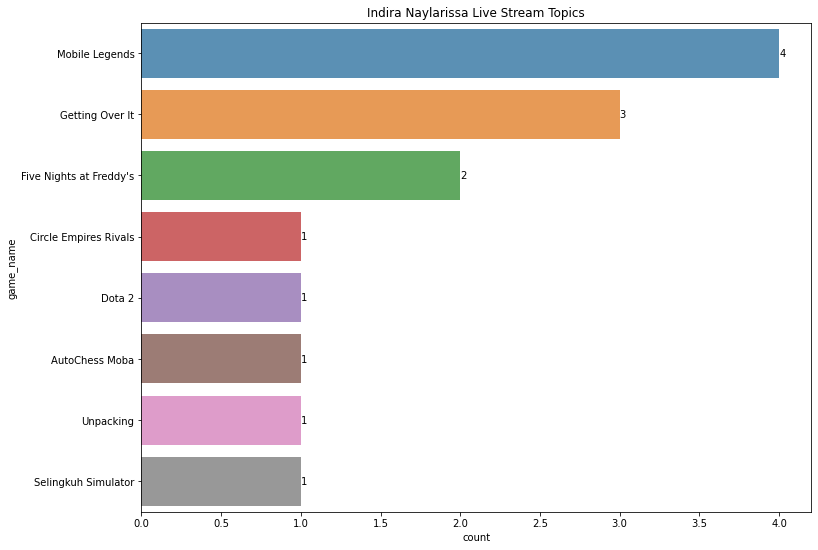

In [103]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Live Stream Topics')
ax = sns.countplot(y=data_game['game_name'], alpha=0.8, order = data_game['game_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [121]:
data_game[data_game["views"] == max(data_game["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
59,60,MAIIIIIIIN,900.0,2022-12-14,Live,Unpacking,UNKNOWN,Game,04:42:39,21:00:00,01:42,Rabu,21,282.65


In [122]:
data_game[data_game["views"] == min(data_game["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
22,23,Mobile Legends Part2,397.0,2022-10-25,Live,Mobile Legends,Guerilla,Game,02:11:56,00:00:00,02:11,Selasa,0,131.93
